In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# File to Load
file_to_load = "Resources/purchase_data.csv"

In [3]:
# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [4]:
# Player Count
total_players = purchase_data["SN"].nunique()
pd.DataFrame({"Total Players": [total_players]})

,Total Players
0,576


In [5]:
# Purchasing Analysis (Total)
unique_items = purchase_data["Item ID"].nunique()
average_price = purchase_data["Price"].mean()
number_of_purchase = purchase_data["Purchase ID"].count()
total_revenue = purchase_data["Price"].sum()

summary_df = pd.DataFrame({
    "Number of Unique Items": [unique_items],
    "Average Price": [average_price],
    "Number of Purchases": [number_of_purchase],
    "Total Revenue": [total_revenue]
})

summary_df["Average Price"] = summary_df["Average Price"].map("${:,.2f}".format)
summary_df["Total Revenue"] = summary_df["Total Revenue"].map("${:,.2f}".format)

summary_df[["Number of Unique Items", "Average Price", "Number of Purchases", "Total Revenue"]]

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,$3.05,780,"$2,379.77"


,Total Count,Percentage of Players
Gender,,
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%


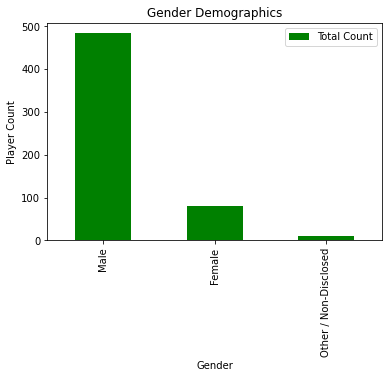

In [6]:
# Gender Demographics

unique_sn = purchase_data.drop_duplicates(subset = "SN")

gender_sum = unique_sn["Gender"].value_counts()

percentage_gender = gender_sum / unique_sn["Gender"].count() * 100

gender_summary_df = pd.DataFrame({
    "Total Count": gender_sum,
    "Percentage of Players": percentage_gender
})

gender_summary_df["Percentage of Players"] = gender_summary_df["Percentage of Players"].map("{:.2f}%".format)

gender_summary_df = gender_summary_df.rename_axis("Gender")

gender_summary_df.plot(kind = 'bar', facecolor = 'green')
#plt.xticks(gender_sum, rotation=45)
plt.title('Gender Demographics')
plt.xlabel('Gender')
plt.ylabel('Player Count')

gender_summary_df

In [7]:
gender_count = purchase_data.groupby("Gender")

purchase_count = gender_count["Purchase ID"].count()
average_price = gender_count["Price"].mean()
purchase_value = gender_count["Price"].sum()
average_total = purchase_value / gender_sum

gender_purchase = pd.DataFrame({
    "Purchase Count": purchase_count,
    "Average Purchase Price": average_price,
    "Total Purchase Value": purchase_value,
    "Avg Total Purchase per Person": average_total,
})


gender_purchase = gender_purchase.sort_values(["Purchase Count"], ascending = False)

gender_purchase["Average Purchase Price"] = gender_purchase["Average Purchase Price"].map("${:.2f}".format)
gender_purchase["Total Purchase Value"] = gender_purchase["Total Purchase Value"].map("${:.2f}".format)
gender_purchase["Avg Total Purchase per Person"] = gender_purchase["Avg Total Purchase per Person"].map("${:.2f}".format)

gender_purchase

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Male,652,$3.02,$1967.64,$4.07
Female,113,$3.20,$361.94,$4.47
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


C:\Users\e_mcs\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Total Count,Percentage of Players
Age Range,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


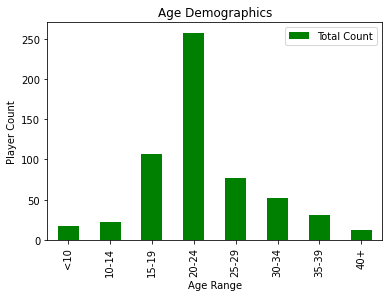

In [11]:
# Age Demograpics
bins = [0,9,14,19,24,29,34,39,100]
ages = ["<10","10-14","15-19","20-24","25-29","30-34","35-39","40+"]

unique_sn["Age Range"] = pd.cut(unique_sn["Age"], bins, labels = ages)

ages_purchase_count = unique_sn["Age Range"].value_counts()
ages_player_percent = (ages_purchase_count/unique_sn["Age"].count())*100


ages_df = pd.DataFrame({
    "Total Count": ages_purchase_count,
    "Percentage of Players": ages_player_percent
})


ages_df["Percentage of Players"] = ages_df["Percentage of Players"].map("{:.2f}%".format)

ages_df = ages_df.rename_axis("Age Range")

ages_df=ages_df.sort_index()

ages_df.plot(kind = 'bar', facecolor = 'green')
plt.title('Age Demographics')
plt.xlabel('Age Range')
plt.ylabel('Player Count')

ages_df

In [21]:
# Purchasing Analysis (Age)
purchase_data["Age Range"] = pd.cut(purchase_data["Age"],bins, labels = ages)
purchase_count = purchase_data["Age Range"].value_counts()

average_price = purchase_data.groupby("Age Range")["Price"].mean()
ages_purchase_total = purchase_data.groupby("Age Range")["Price"].sum()
ages_average = ages_purchase_total/ages_purchase_count

age_summary = pd.DataFrame({
    "Purchase Count": purchase_count,
    "Average Purchase Price": average_price,
    "Total Purchase Value": ages_purchase_total,
    "Avg Total Purchase per Person": ages_average
})

age_summary["Average Purchase Price"] = age_summary["Average Purchase Price"].map("${:,.2f}".format)
age_summary["Total Purchase Value"] = age_summary["Total Purchase Value"].map("${:,.2f}".format)
age_summary["Avg Total Purchase per Person"] = age_summary["Avg Total Purchase per Person"].map("${:,.2f}".format)

age_summary = age_summary.rename_axis("Age Range")

age_summary

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Range,,,,
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


In [22]:
# Top Spenders

spender_data = purchase_data.groupby("SN")
spender_purchase = spender_data["Purchase ID"].count()
spender_average_purchase = spender_data["Price"].mean()
spender_total = spender_data["Price"].sum()

top_spenders = pd.DataFrame({
    "Purchase Count": spender_purchase,
    "Average Purchase Price": spender_average_purchase,
    "Total Purchase Value": spender_total
})

spender_list = top_spenders.sort_values(["Total Purchase Value"], ascending = False).head()

spender_list["Average Purchase Price"] = spender_list["Average Purchase Price"].map("${:,.2f}".format)
spender_list["Total Purchase Value"] = spender_list["Total Purchase Value"].map("${:,.2f}".format)

spender_list = spender_list.rename_axis("Top Spenders")

spender_list

,Purchase Count,Average Purchase Price,Total Purchase Value
Top Spenders,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


In [23]:
# Most Popular Item

most_purchased = purchase_data.groupby(["Item ID", "Item Name"])["Price"].count()
most_popular = purchase_data.groupby(["Item ID", "Item Name"])["Price"].sum()
item_price = most_popular / most_purchased

item_summary = pd.DataFrame({
    "Purchase Count": most_purchased,
    "Item Price": item_price,
    "Total Purchase Value": most_popular
})

item_summary_view = item_summary.sort_values("Purchase Count", ascending = False).head()

item_summary_view["Item Price"] = item_summary_view["Item Price"].map("${:,.2f}".format)
item_summary_view["Total Purchase Value"] = item_summary_view["Total Purchase Value"].map("${:,.2f}".format)

item_summary_view

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
132,Persuasion,9,$3.22,$28.99
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77


In [24]:
# Most Profitable Items

highest_profit = item_summary.sort_values("Total Purchase Value", ascending = False).head()


highest_profit["Item Price"] = highest_profit["Item Price"].map("${:,.2f}".format)
highest_profit["Total Purchase Value"] = highest_profit["Total Purchase Value"].map("${:,.2f}".format)

highest_profit

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
103,Singed Scalpel,8,$4.35,$34.80
